In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno


In [2]:
# function to clean column names
def clear_cols(s):
    return s.strip().replace(" ","_")
# load data
path = '../Healthcare Provider Fraud Detection Analysis/Test_Beneficiarydata-1542969243754.csv'
df = pd.read_csv(path).rename(columns=clear_cols)

# display all columns
pd.set_option('display.max_columns', 50)

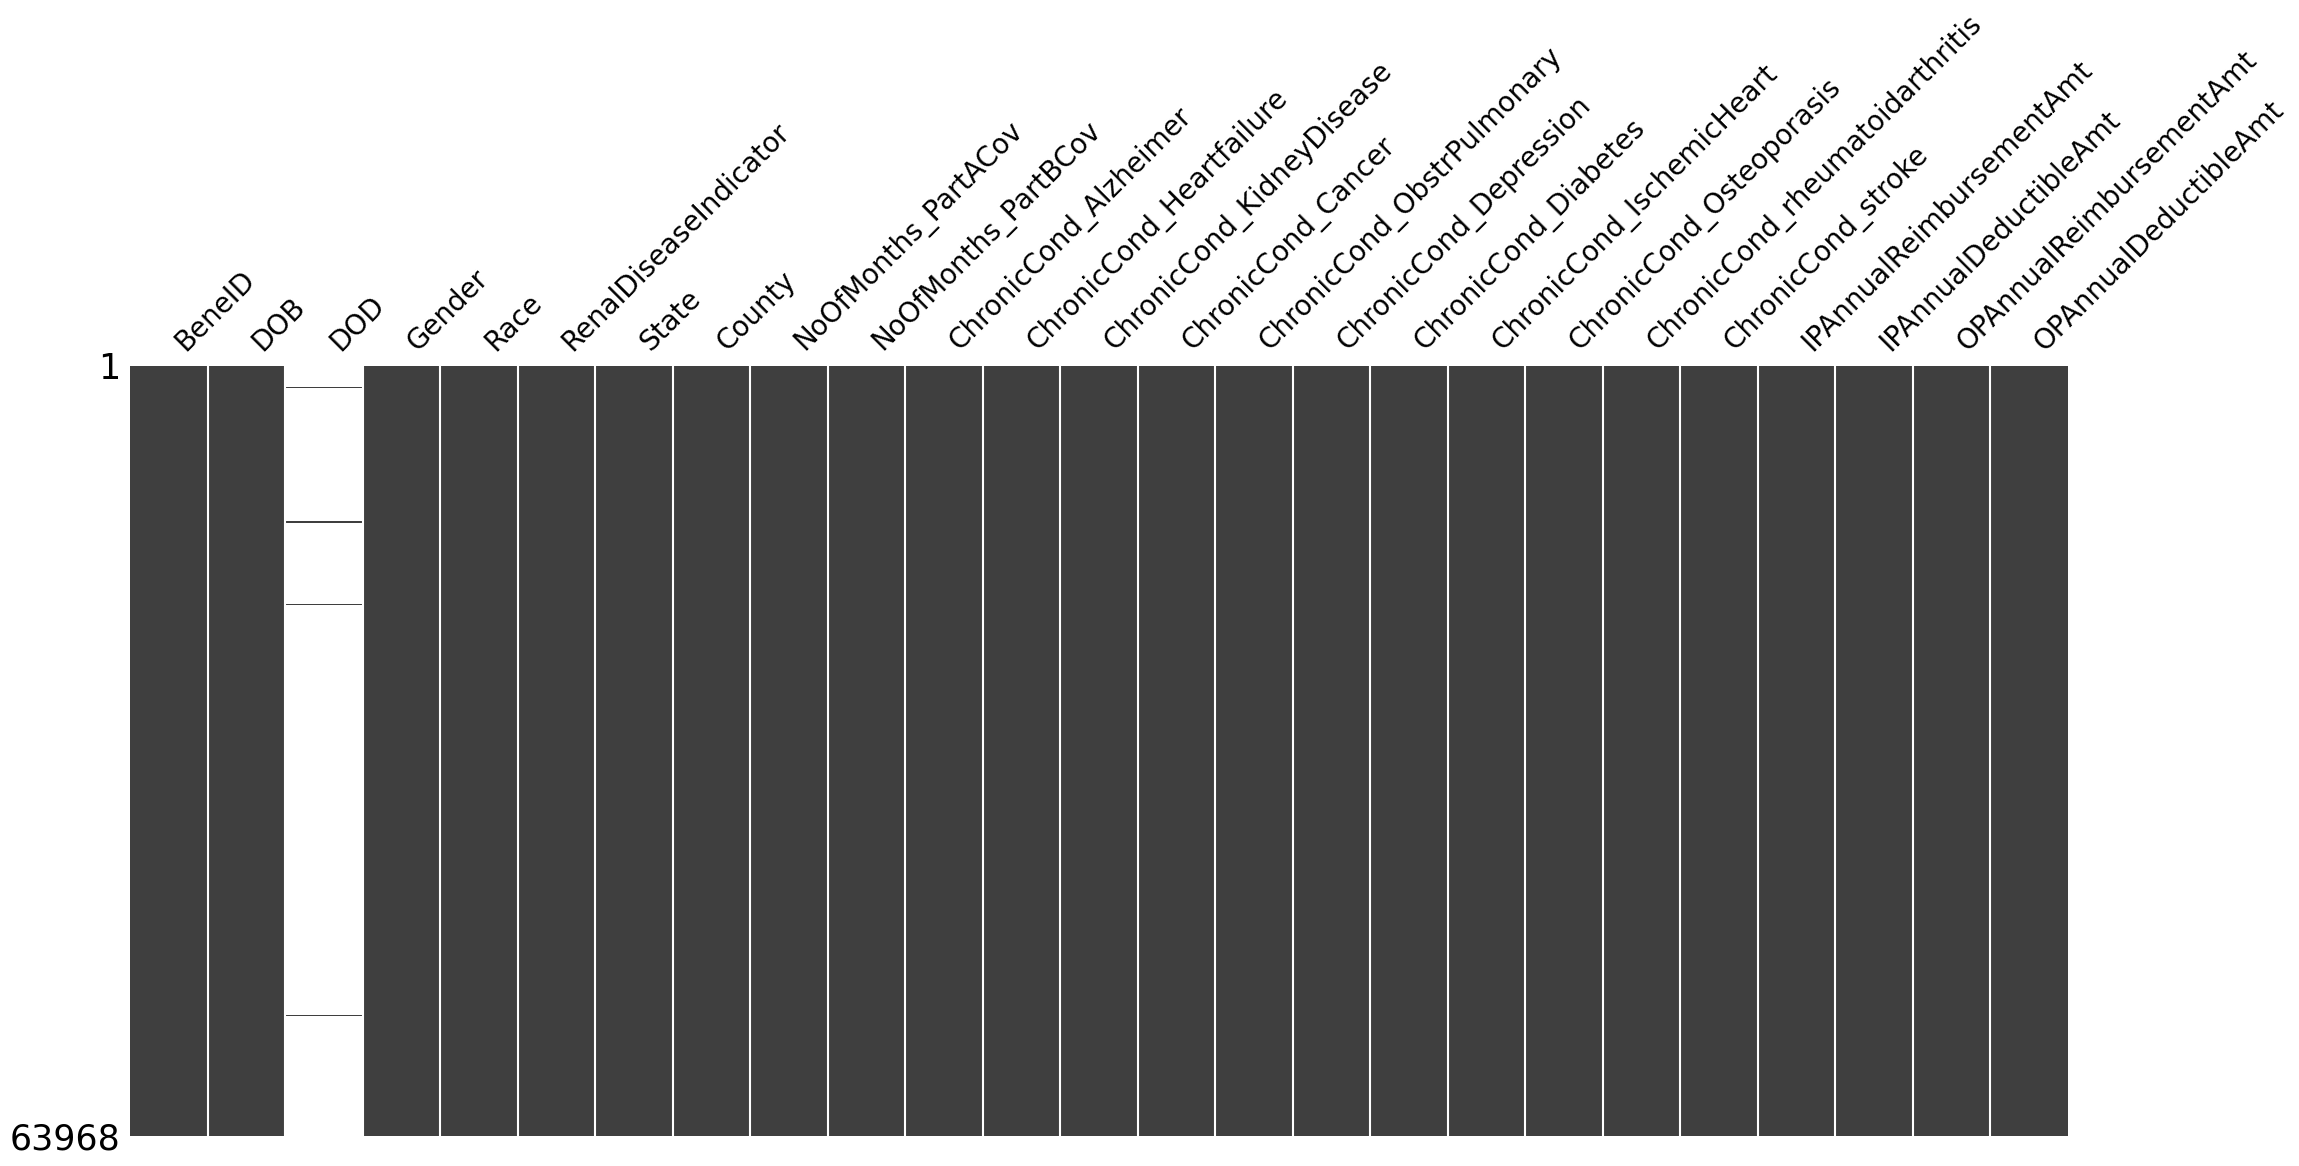

In [3]:
msno.matrix(df, sparkline=False, fontsize=20)
plt.show()

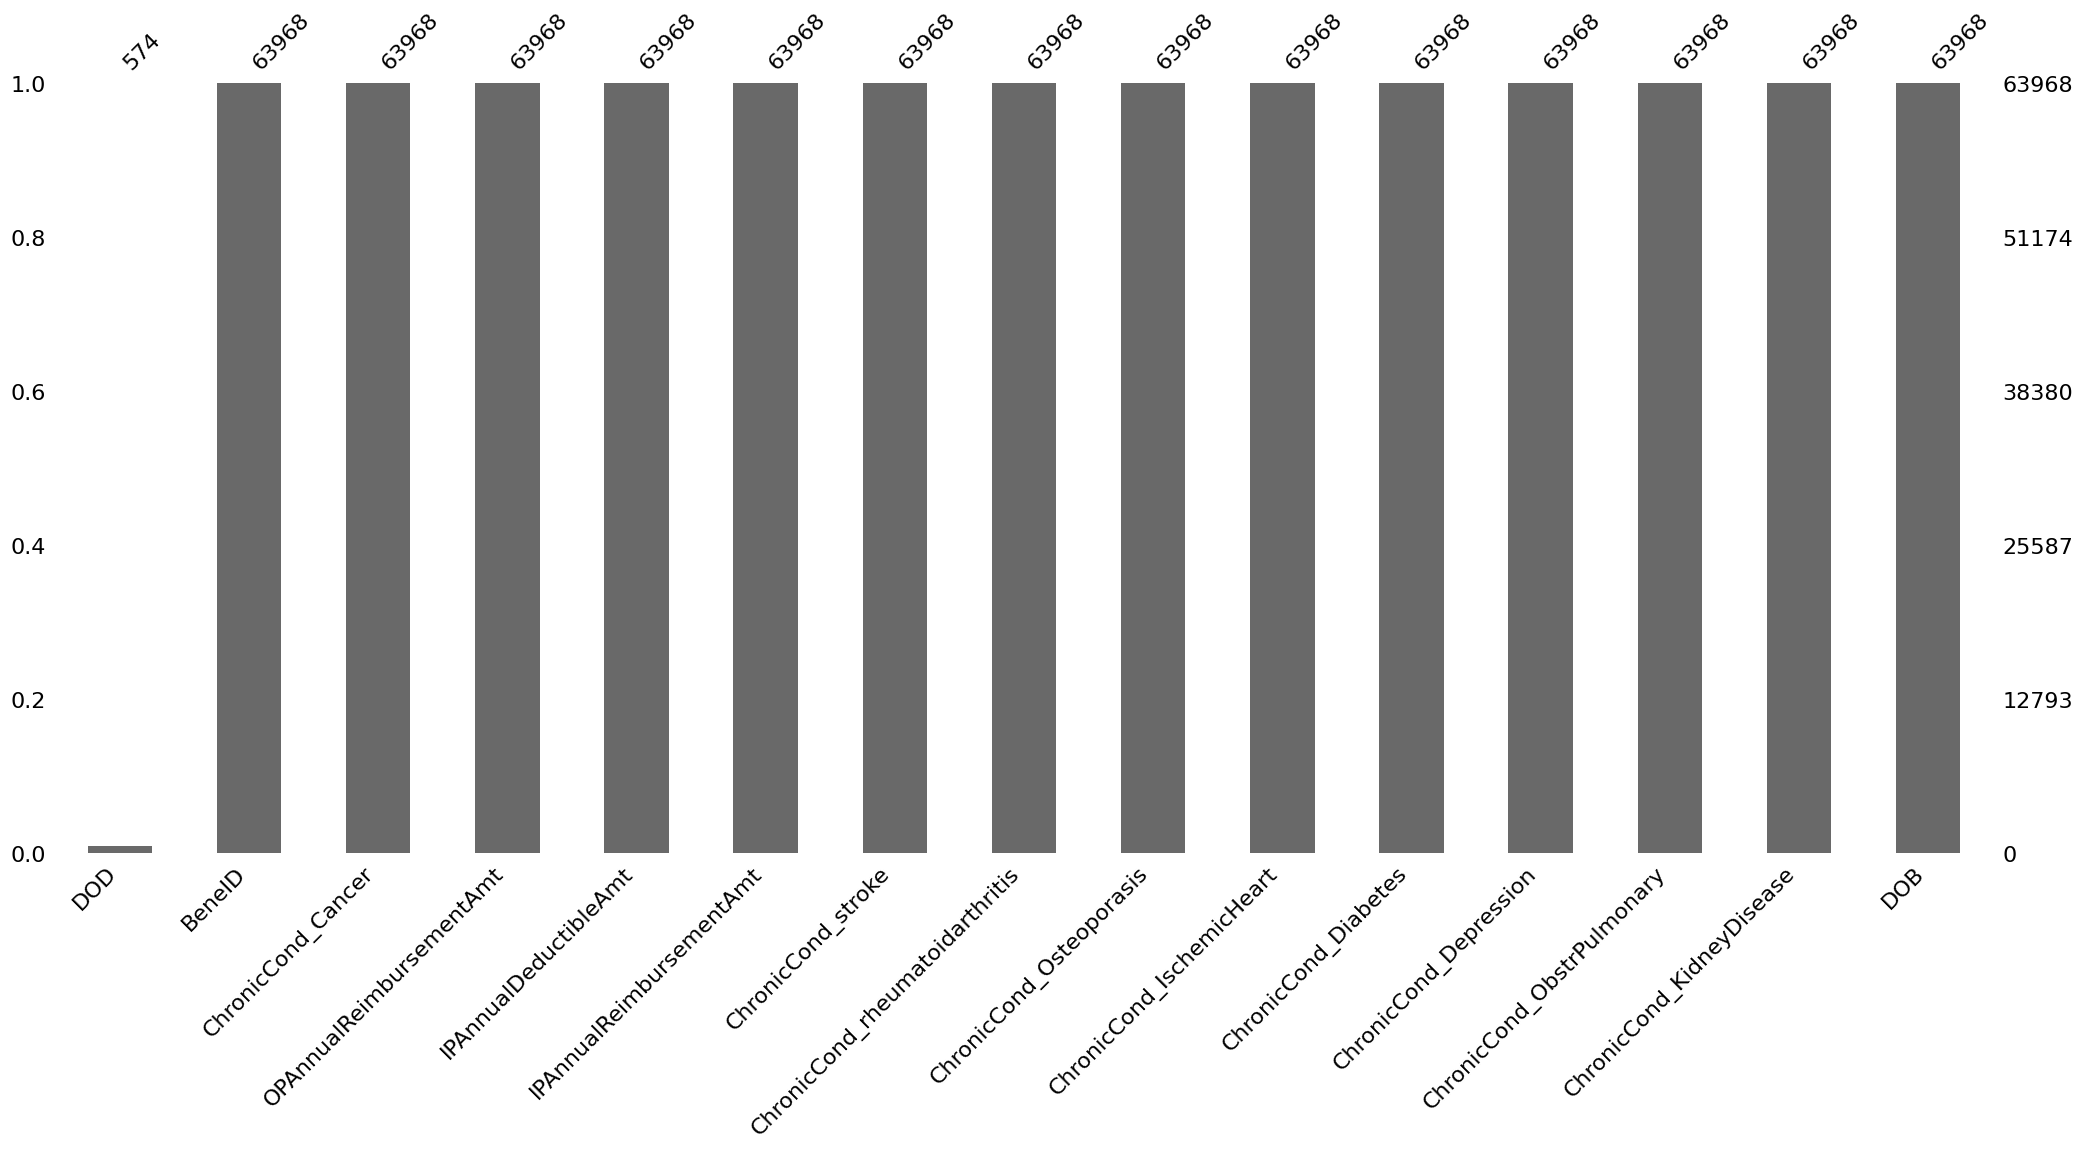

In [4]:
# Calculating the percentage of missing values for each column
missing_data = df.isnull().sum()
missing_percentage = (missing_data / len(df)) * 100

# Combining the counts and percentages into a DataFrame for better visualization
missing_info = pd.DataFrame({'Missing Values': missing_data, 'Percentage': missing_percentage})

# Sort the DataFrame columns by the percentage of missing values
sorted_df = df[missing_info.sort_values(by='Percentage', ascending=False).index]

# Select the top 15 columns with the most missing values
top_15_missing = sorted_df.iloc[:, :15]

#Visual with missingno
msno.bar(top_15_missing)
plt.show()

In [5]:
print("shape: ", df.shape)
df.sample(5)

shape:  (63968, 25)


,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
6569,BENE26124,1923-07-01,NaN,1,1,0,26,110,12,12,2,1,2,2,2,2,1,1,2,2,2,0,0,370,310
15562,BENE47042,1932-06-01,NaN,1,3,0,10,300,12,12,2,1,2,2,2,2,1,2,1,1,2,11000,1068,0,0
35408,BENE93000,1933-01-01,NaN,1,1,0,14,141,12,12,1,1,2,1,2,1,1,1,2,2,2,8000,1068,2460,430
63329,BENE157736,1935-07-01,NaN,2,1,Y,3,90,12,12,2,1,1,2,2,2,1,1,1,2,2,28350,1068,320,10
24262,BENE67134,1925-07-01,NaN,2,1,0,35,440,12,12,2,2,2,2,2,2,2,1,1,2,2,0,0,700,100
